## Loading Libraries & Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL.Image
%matplotlib inline

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tqdm import tqdm
from sklearn.metrics import *

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/COVID-19_Data/Chest_xray_Corona_Metadata.csv')

## Preprocessing

In [ ]:
df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [ ]:
final_df =  df[df['Dataset_type'] == 'TRAIN']
unused_test = df[df['Dataset_type'] == 'TEST']
final_df['label'] = final_df.Label_2_Virus_category.apply(lambda x: 1 if x=='COVID-19' else 0)
unused_test['label'] = unused_test.Label_2_Virus_category.apply(lambda x: 1 if x=='COVID-19' else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
columns = ['Label_1_Virus_category', 'Label', 
           'Label_2_Virus_category']
final_df = final_df.drop(columns, axis=1)
unused_test = unused_test.drop(columns, axis=1)

In [ ]:
final_df.head()

,Unnamed: 0,X_ray_image_name,Dataset_type,label
0,0,IM-0128-0001.jpeg,TRAIN,0
1,1,IM-0127-0001.jpeg,TRAIN,0
2,2,IM-0125-0001.jpeg,TRAIN,0
3,3,IM-0122-0001.jpeg,TRAIN,0
4,4,IM-0119-0001.jpeg,TRAIN,0


In [ ]:
img_dir = '/content/drive/MyDrive/COVID-19_Data/train'

In [ ]:
def read_img(filename, size, path):
    img = keras.preprocessing.image.load_img(os.path.join(path, filename), target_size=size)
    img = img_to_array(img) / 255
    return img

In [ ]:
final_df_img = []
final_df['X_ray_image_name'].apply(lambda x: 
                                   final_df_img.append(read_img(x, (255,255), 
                                                                img_dir)))

0       None
1       None
2       None
3       None
4       None
        ... 
5281    None
5282    None
5283    None
5284    None
5285    None
Name: X_ray_image_name, Length: 5286, dtype: object

In [ ]:
labels = np.int64(final_df['label'].values)

In [ ]:
train_df, test_df, train_img, test_img, y_train, y_test = train_test_split(final_df, final_df_img,
                                        labels, 
                                        test_size=0.1, random_state=42, 
                                        stratify=labels)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


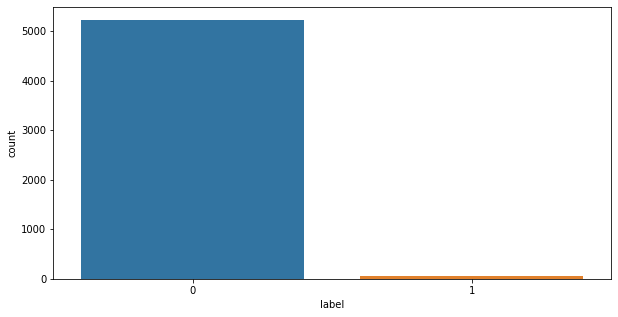

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(final_df['label']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


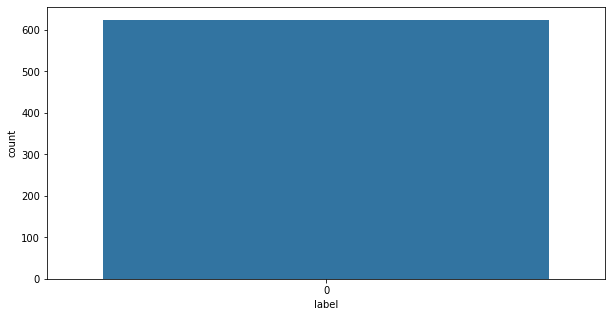

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(unused_test['label']);

In [ ]:
corona_df = train_df[train_df['label'] == 1]

In [ ]:
corona_img_path = corona_df['X_ray_image_name']
corona_img_path = list(map(lambda x: os.path.join(img_dir, x), corona_img_path))

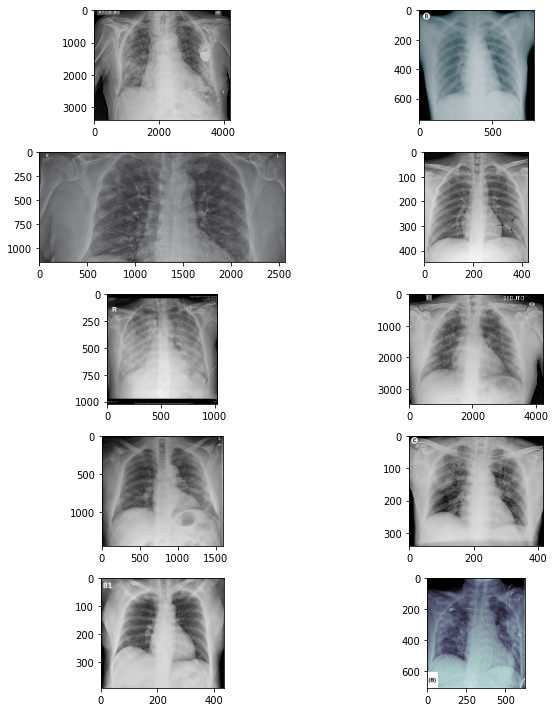

In [ ]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(corona_img_path):
    image = PIL.Image.open(filename)
    plt.subplot(5,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)
    if(iterator == 9):
      break

plt.tight_layout()

In [ ]:
image_aug = ImageDataGenerator(
 rotation_range=30,
 zoom_range=0.15,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.15,
 horizontal_flip=True,
 fill_mode="nearest")

In [ ]:
def augment(name):
    img = read_img(name, (255,255), img_dir)
    i = 0
    for batch in tqdm(image_aug.flow(tf.expand_dims(img, 0), batch_size=32)):
        corona_aug.append(tf.squeeze(batch).numpy())
        if i == 20:
            break
        i =i+1

In [ ]:
corona_aug = []

In [ ]:
corona_df['X_ray_image_name'].apply(augment)

18it [00:00, 69.90it/s]
18it [00:00, 69.96it/s]
18it [00:00, 69.96it/s]
17it [00:00, 65.63it/s]
17it [00:00, 65.09it/s]
18it [00:00, 69.98it/s]
17it [00:00, 63.66it/s]
18it [00:00, 71.44it/s]
18it [00:00, 69.26it/s]
18it [00:00, 69.92it/s]
18it [00:00, 69.99it/s]
17it [00:00, 65.60it/s]
17it [00:00, 64.28it/s]
18it [00:00, 70.82it/s]
18it [00:00, 69.63it/s]
17it [00:00, 64.86it/s]
17it [00:00, 64.82it/s]
18it [00:00, 69.72it/s]
18it [00:00, 69.25it/s]
17it [00:00, 64.15it/s]
18it [00:00, 69.27it/s]
18it [00:00, 69.32it/s]
16it [00:00, 60.96it/s]
17it [00:00, 64.85it/s]
17it [00:00, 65.14it/s]
18it [00:00, 69.99it/s]
18it [00:00, 68.21it/s]
18it [00:00, 69.40it/s]
17it [00:00, 64.85it/s]
18it [00:00, 70.21it/s]
18it [00:00, 70.63it/s]
17it [00:00, 65.77it/s]
17it [00:00, 62.83it/s]
16it [00:00, 59.79it/s]
17it [00:00, 64.30it/s]
18it [00:00, 68.51it/s]
18it [00:00, 69.76it/s]
17it [00:00, 64.88it/s]
17it [00:00, 64.69it/s]
17it [00:00, 63.92it/s]
17it [00:00, 63.10it/s]
17it [00:00, 65.

5252    None
5228    None
5284    None
5222    None
5267    None
5269    None
5247    None
5225    None
5275    None
5230    None
5250    None
5257    None
5258    None
5255    None
5277    None
5253    None
5238    None
5240    None
5254    None
5263    None
5229    None
5245    None
5272    None
5223    None
5281    None
5266    None
5243    None
5283    None
5249    None
5282    None
5237    None
5285    None
5264    None
5273    None
5259    None
5227    None
5239    None
5260    None
5248    None
5278    None
5268    None
5242    None
5280    None
5279    None
5265    None
5256    None
5261    None
5251    None
5226    None
5221    None
5224    None
5276    None
Name: X_ray_image_name, dtype: object

In [ ]:
y_train = np.concatenate((np.int64(train_df['label'].values), 
                         np.ones(len(corona_aug), dtype=np.int64)))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


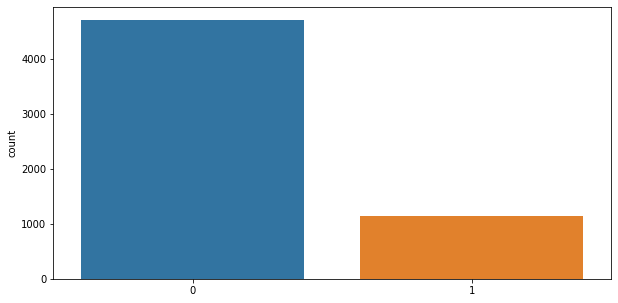

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y_train)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 4705]
 [   1 1144]]


In [ ]:
train_img.extend(corona_aug)

## Creating 11 layer ResNet model and Training

In [ ]:
train_img_final, validation_img, y_train_final, y_validation = train_test_split(train_img, 
                                        y_train, 
                                        test_size=0.2, random_state=42, 
                                        stratify=y_train)

In [ ]:
X_train_tensors = tf.convert_to_tensor(np.array(train_img_final))
X_test_tensors = tf.convert_to_tensor(np.array(test_img))
X_validation_tensors = tf.convert_to_tensor(np.array(validation_img))

y_train_tensors = tf.convert_to_tensor(np.array(y_train_final))
y_test_tensors = tf.convert_to_tensor(np.array(y_test))
y_validation_tensors = tf.convert_to_tensor(np.array(y_validation))

In [ ]:
#define input shape
INPUT_SHAPE = (255,255,3) 

In [ ]:
# Building the ResNet Model
def build_resnet(input_shape, n_feature_maps, nb_classes):
    print ('build conv_x')
    x = keras.layers.Input(shape=(input_shape))
    conv_x = keras.layers.BatchNormalization()(x)
    conv_x = keras.layers.Conv2D(n_feature_maps, 8, 1, padding='same')(conv_x)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps, 1, 1,padding='same')(x)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)
     
    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    print ('build conv_x')
    x1 = y
    conv_x = keras.layers.Conv2D(n_feature_maps*2, 8, 1, padding='same')(x1)
    conv_x = keras.layers.BatchNormalization()(conv_x)
    conv_x = keras.layers.Activation('relu')(conv_x)
     
    print ('build conv_y')
    conv_y = keras.layers.Conv2D(n_feature_maps*2, 5, 1, padding='same')(conv_x)
    conv_y = keras.layers.BatchNormalization()(conv_y)
    conv_y = keras.layers.Activation('relu')(conv_y)
     
    print ('build conv_z')
    conv_z = keras.layers.Conv2D(n_feature_maps*2, 3, 1, padding='same')(conv_y)
    conv_z = keras.layers.BatchNormalization()(conv_z)

    is_expand_channels = not (input_shape[-1] == n_feature_maps*2)
    if is_expand_channels:
        shortcut_y = keras.layers.Conv2D(n_feature_maps*2, 1, 1,padding='same')(x1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)
    else:
        shortcut_y = keras.layers.BatchNormalization()(x1)
    print ('Merging skip connection')
    y = keras.layers.Add()([shortcut_y, conv_z])
    y = keras.layers.Activation('relu')(y)
     
    full = keras.layers.GlobalAveragePooling2D()(y)
    out = keras.layers.Dense(1, activation='sigmoid')(full)
    print ('      -- model was built.')
    return x, out

x, y = build_resnet(INPUT_SHAPE, 64, 2)
model = models.Model(inputs=x, outputs=y)

model.summary()

build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
build conv_x
build conv_y
build conv_z
Merging skip connection
      -- model was built.
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 255, 255, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization_39 (BatchNo (None, 255, 255, 3)  12          input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 255, 255, 64) 12352       batch_normalization_39[0][0]     
___________________________________________________________________________

In [ ]:
# Using adaptive learning
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5,
                                              patience=50, min_lr=0.1) 

# model compiling
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train_tensors, y_train_tensors, batch_size=16, 
                 epochs=10, shuffle=True, verbose=1,
                 validation_data=(X_validation_tensors, y_validation_tensors),
                 callbacks = [reduce_lr])

Epoch 1/10
293/293 [==============================] - 395s 1s/step - loss: 0.2673 - accuracy: 0.8853 - val_loss: 1.4936 - val_accuracy: 0.8094
Epoch 2/10
293/293 [==============================] - 393s 1s/step - loss: 0.1083 - accuracy: 0.9672 - val_loss: 0.2316 - val_accuracy: 0.9214
Epoch 3/10
293/293 [==============================] - 393s 1s/step - loss: 0.0832 - accuracy: 0.9748 - val_loss: 0.2534 - val_accuracy: 0.9316
Epoch 4/10
293/293 [==============================] - 393s 1s/step - loss: 0.0559 - accuracy: 0.9822 - val_loss: 0.1218 - val_accuracy: 0.9675
Epoch 5/10
293/293 [==============================] - 393s 1s/step - loss: 0.0543 - accuracy: 0.9851 - val_loss: 0.1738 - val_accuracy: 0.9479
Epoch 6/10
293/293 [==============================] - 393s 1s/step - loss: 0.0399 - accuracy: 0.9882 - val_loss: 0.1170 - val_accuracy: 0.9556
Epoch 7/10
293/293 [==============================] - 393s 1s/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.0812 - val_accuracy: 0.9786

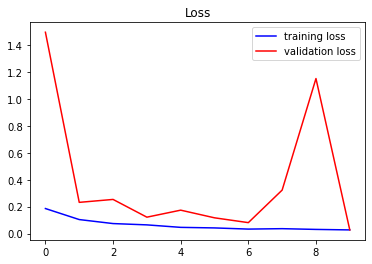

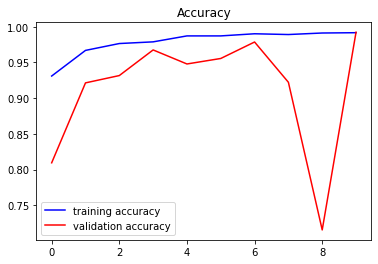

In [ ]:
# Plotting loss and accuracy

plt.plot(hist.history['loss'], color='b', label='training loss')
plt.plot(hist.history['val_loss'], color='r', label='validation loss')
plt.title('Loss')
plt.legend()
plt.show()
plt.plot(hist.history['accuracy'], color='b', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='validation accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

## Evaluation of Model Success

In [ ]:
# Feeding test data to model
y_prob = model.predict(X_test_tensors)
y_pred = np.round_(y_prob)

# Plotting confusion matrix
cm = confusion_matrix(y_test_tensors, y_pred)
print(cm)

[[521   2]
 [  0   6]]


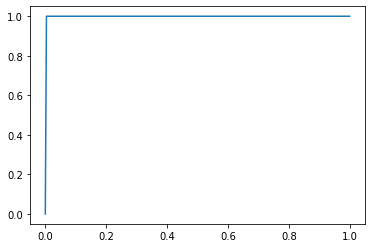

ROC area under curve is 0.9981


In [ ]:
# Plotting ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.show()
print("ROC area under curve is {0:.4f}".format(roc_auc_score(y_test, y_pred)))